## 5. Time Series Specific: ARIMA

Use case: For time-series data with trends and seasonality.

Why use:

Specifically designed for forecasting in time-series data.
Captures auto-correlation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [3]:
data=pd.read_csv('AirPassengers.csv')

In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [6]:
print(data.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [7]:
#converting a month to date_time format
data['Month'] = pd.to_datetime(data['Month'])  # Parse dates
data.set_index('Month', inplace=True)

In [8]:
data['TimeIndex']=np.arange(len(data))

In [9]:
# Instead of using the lists 'x' and 'y', access the data directly from the DataFrame:
X = data[['TimeIndex']]  # Use double brackets to select as a DataFrame
y = data['#Passengers']

# Now you can split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
# Fit ARIMA model
model_arima = ARIMA(data['#Passengers'], order=(5, 1, 0))  # Adjust order (p, d, q)
arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
# Predictions
forecast = arima_fit.forecast(steps=12)

<ipython-input-20-9cafffa22f64>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=12, freq='M'), forecast, label='ARIMA Forecast', color='brown')


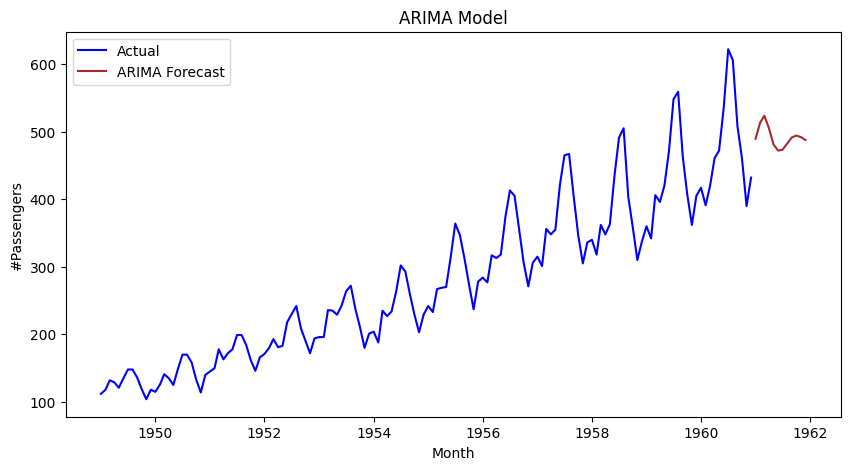

In [20]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label='Actual', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=12, freq='M'), forecast, label='ARIMA Forecast', color='brown')
plt.legend()
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('ARIMA Model')
plt.show()